In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
np.random.seed(4396)

# samp1 [10,0] [[3,1],[1,4]]
# samp2 [0,10] [[3,1],[1,4]]

c1 = np.random.multivariate_normal([10,0], [[3,1],[1,4]], size=(100))
l1 = np.zeros(100)
c2 = np.random.multivariate_normal([0,10], [[3,1], [1,4]], size=(100))
l2 = np.ones(100)

noise1x = np.random.normal(0,2, (100))
noise1y = np.random.normal(0,8, (100))
noise2 = np.random.normal(0,8, (100))

c1[:, 0] += noise1x
c1[:, 1] += noise1y
c2[:, 1] += noise2


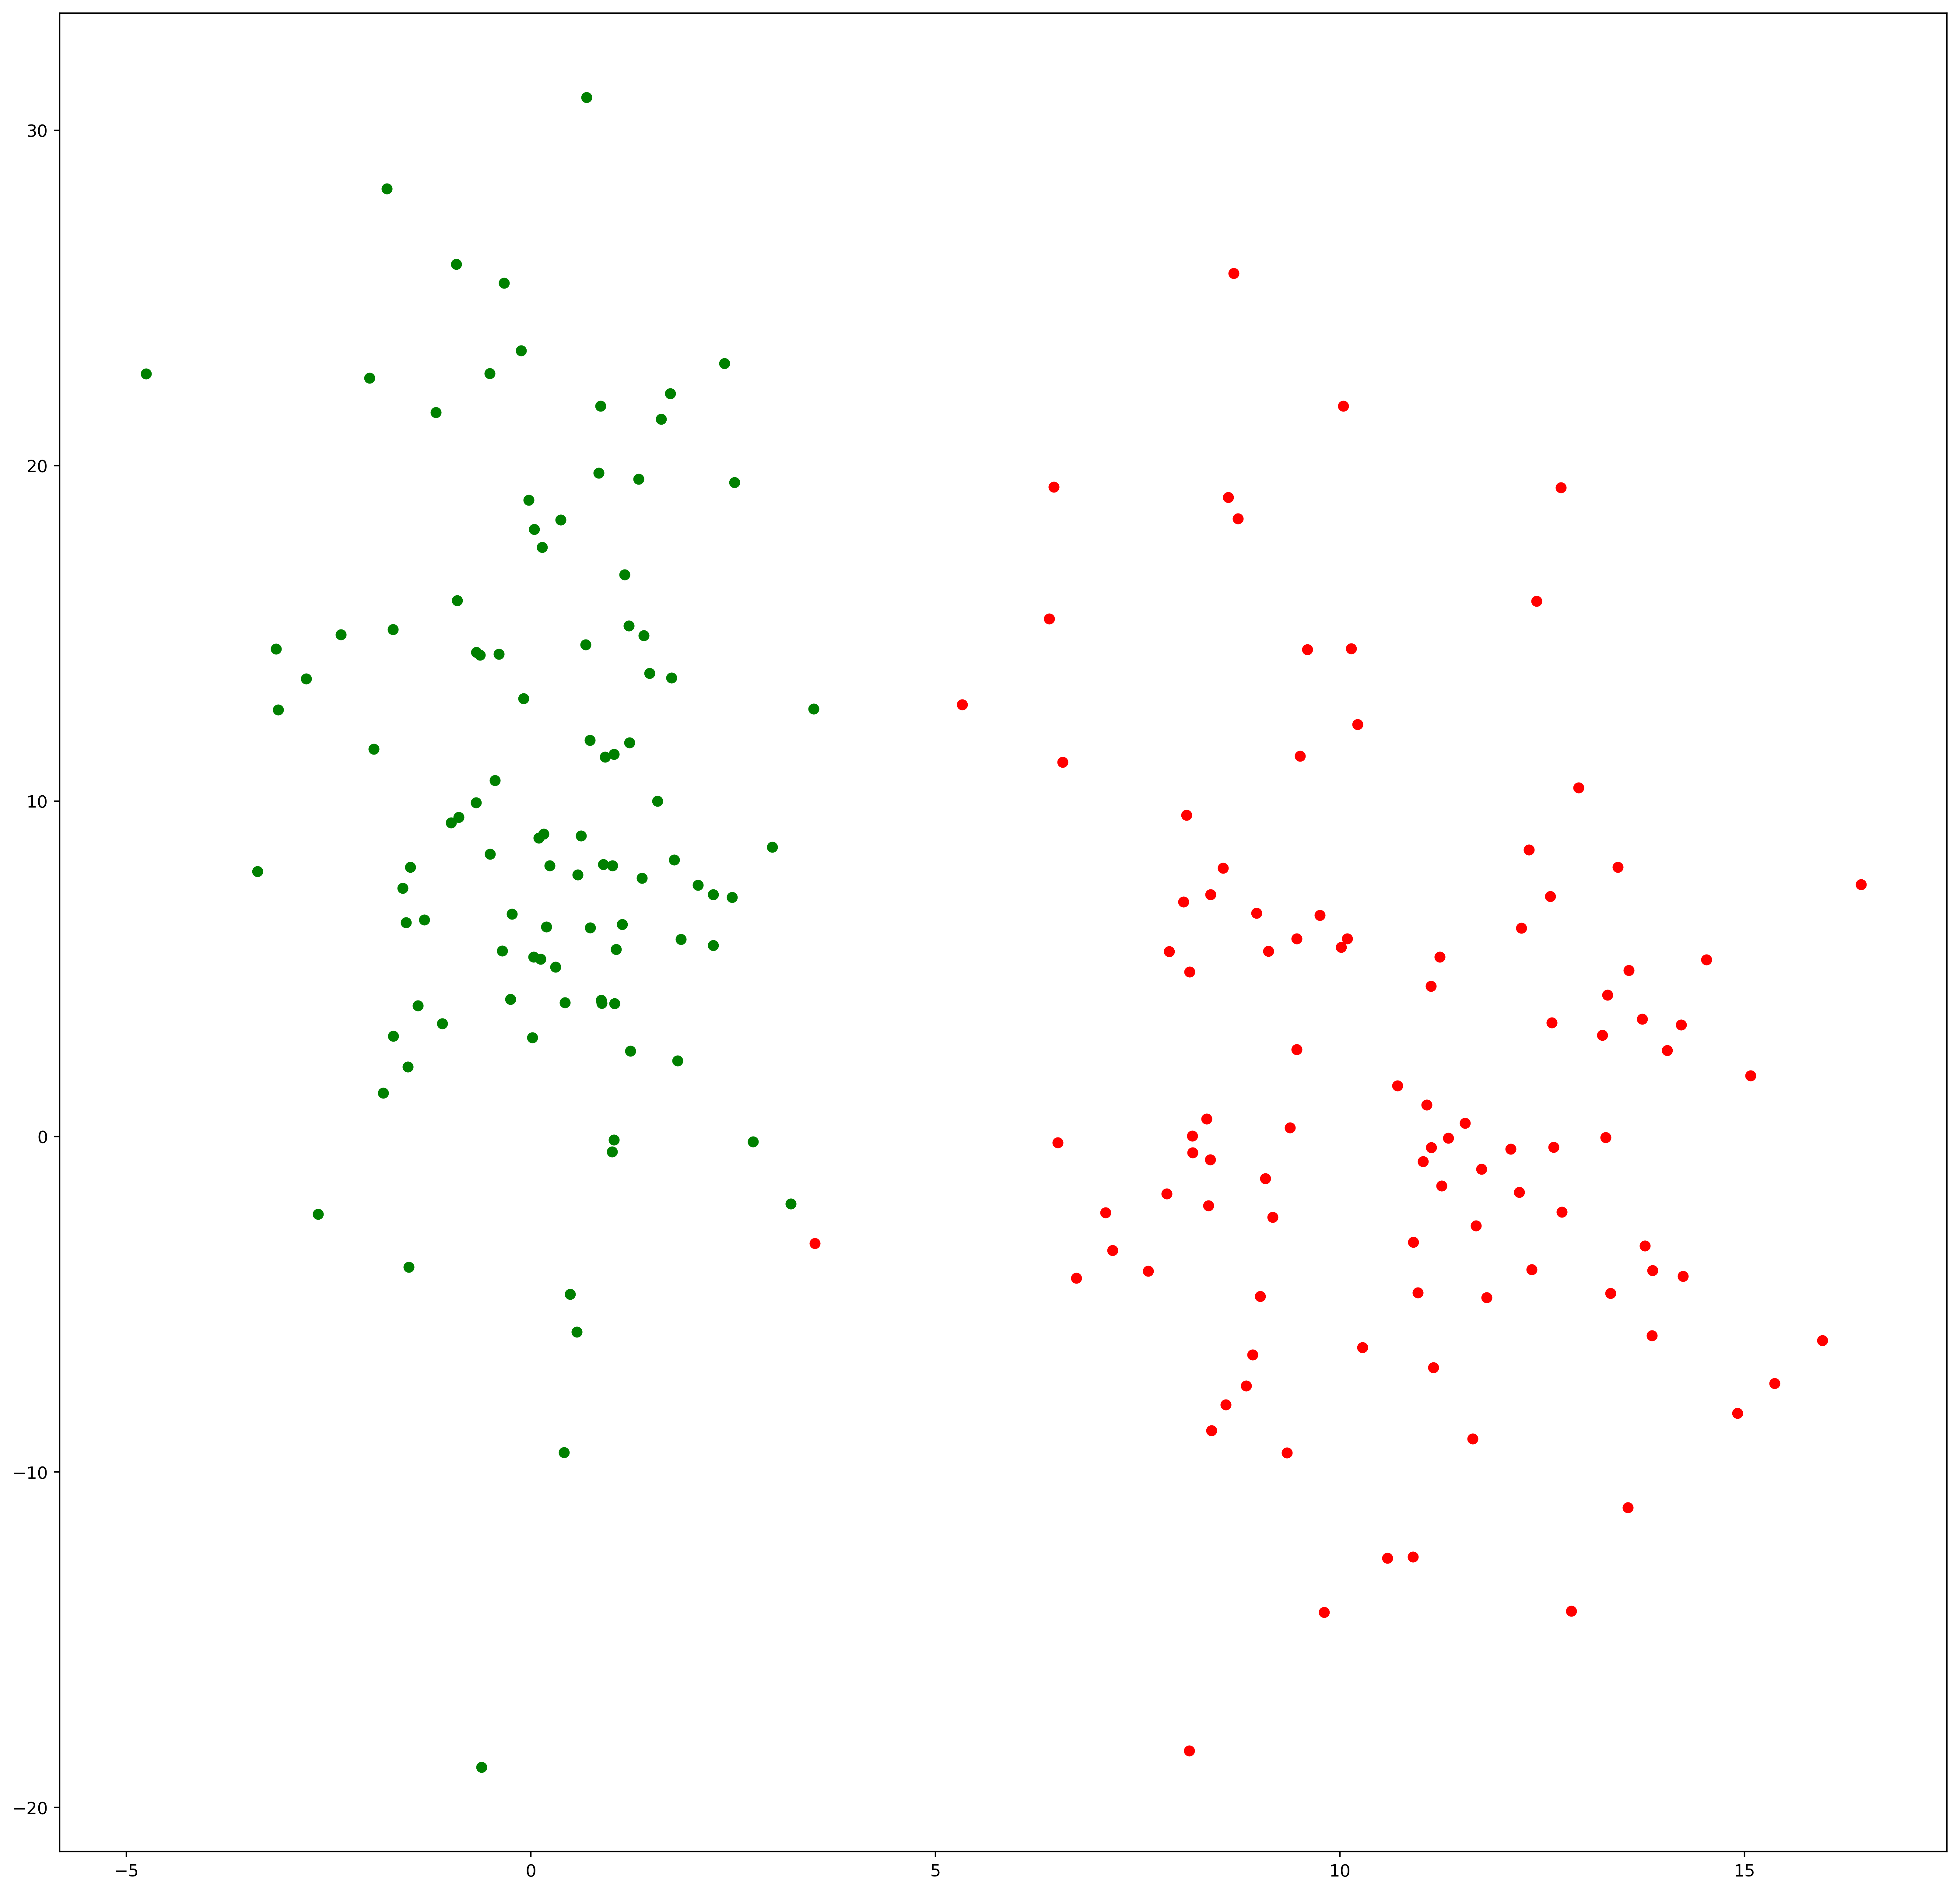

In [50]:
plt.figure(figsize=(20,20),dpi=400)
ax = plt.subplot(111)

ax.scatter(c1[:,0],c1[:,1], cmap='prism', s=30,c='r')
ax.scatter(c2[:,0],c2[:,1], cmap='prism', s=30, c='g')
plt.show()

In [68]:
# base data
X = np.concatenate((c1,c2),)
y = np.concatenate((l1,l2),)

<Figure size 8000x8000 with 0 Axes>

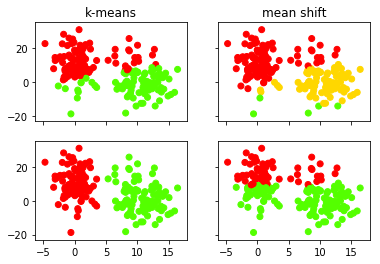

In [80]:
# k-mean
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)

f2 = plt.figure(figsize=(20,20),dpi=400)
f2,((a1,a2), (a3, a4)) = plt.subplots(2, 2, sharex='col', sharey='row')
a1.scatter(X[:,0],X[:,1], c=km.labels_, cmap='prism')
a1.set_title('k-means')

# mean shift 均值偏移
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=7)
ms.fit(X)
a2.scatter(X[:,0],X[:,1], c=ms.labels_, cmap='prism')
a2.set_title('mean shift')

# gaussian mixture 高斯混合
from sklearn.mixture import GaussianMixture
gsm = GaussianMixture(n_components=2)
gsm.fit(X)
g_label = gsm.predict(X)
a3.scatter(X[:,0],X[:,1], c=g_label, cmap='prism')

#层次聚类 hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
Z = linkage(X, 'ward')
pred_f = fcluster(Z,110,criterion='distance')
a4.scatter(X[:,0],X[:,1], c=pred_f, cmap='prism')

In [84]:
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score

km_s = homogeneity_completeness_v_measure(y, km.labels_)
print(km_s, silhouette_score(X,km.labels_))

(0.3810463422992463, 0.38239907716675103, 0.3817215112900091) 0.4648985106265603
